# Histograms in MatplotLib

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

## Basic Histogram

(array([ 2.,  2.,  3.,  7.,  8., 11.,  5.,  8.,  2.,  2.]),
 array([-2.11521182, -1.65752367, -1.19983553, -0.74214739, -0.28445924,
         0.1732289 ,  0.63091705,  1.08860519,  1.54629334,  2.00398148,
         2.46166963]),
 <a list of 10 Patch objects>)

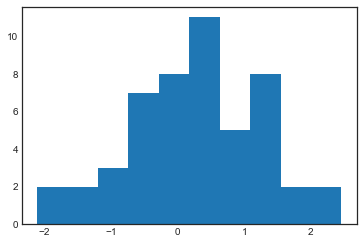

In [2]:
data = np.random.randn(50)
plt.hist(data)

More customizable histogram

(array([1., 0., 1., 0., 2., 0., 2., 0., 1., 0., 0., 7., 4., 3., 1., 7., 2.,
        2., 2., 2., 1., 3., 2., 3., 0., 2., 0., 1., 0., 1.]),
 array([-2.11521182, -1.9626491 , -1.81008639, -1.65752367, -1.50496096,
        -1.35239824, -1.19983553, -1.04727281, -0.8947101 , -0.74214739,
        -0.58958467, -0.43702196, -0.28445924, -0.13189653,  0.02066619,
         0.1732289 ,  0.32579162,  0.47835433,  0.63091705,  0.78347976,
         0.93604248,  1.08860519,  1.24116791,  1.39373062,  1.54629334,
         1.69885605,  1.85141877,  2.00398148,  2.1565442 ,  2.30910691,
         2.46166963]),
 <a list of 1 Patch objects>)

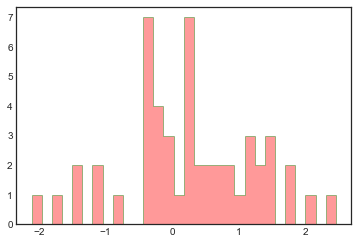

In [4]:
plt.hist(data,bins=30,alpha=0.4,histtype="stepfilled",color="red",edgecolor="green")

## Comparision of histograms

(array([ 3.,  2.,  1.,  0.,  2.,  6.,  7.,  8., 10.,  8., 18., 23., 25.,
        34., 42., 45., 53., 52., 53., 68., 69., 53., 71., 51., 43., 38.,
        47., 34., 31., 27., 14., 18., 19.,  8.,  8.,  3.,  1.,  1.,  2.,
         2.]),
 array([-3.28881912, -2.98676813, -2.68471714, -2.38266615, -2.08061516,
        -1.77856417, -1.47651318, -1.17446219, -0.8724112 , -0.57036021,
        -0.26830922,  0.03374176,  0.33579275,  0.63784374,  0.93989473,
         1.24194572,  1.54399671,  1.8460477 ,  2.14809869,  2.45014968,
         2.75220067,  3.05425166,  3.35630265,  3.65835364,  3.96040463,
         4.26245562,  4.5645066 ,  4.86655759,  5.16860858,  5.47065957,
         5.77271056,  6.07476155,  6.37681254,  6.67886353,  6.98091452,
         7.28296551,  7.5850165 ,  7.88706749,  8.18911848,  8.49116947,
         8.79322046]),
 <a list of 1 Patch objects>)

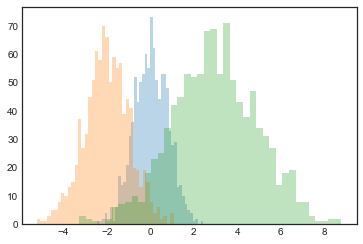

In [7]:
x1 = np.random.normal(0,0.8,1000)
x2 = np.random.normal(-2, 1, 1000)       
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40) #arguments passed as dictionary

plt.hist(x1,**kwargs)
plt.hist(x2,**kwargs)
plt.hist(x3,**kwargs)

In [11]:
counts,bin_edges = np.histogram(data,bins=5)
print(counts)
print(bin_edges)
#it returns histogram edges and no of points in a bin if historgram formed with given data and bins

[ 4 10 19 13  4]
[-2.11521182 -1.19983553 -0.28445924  0.63091705  1.54629334  2.46166963]


## 2D histogram

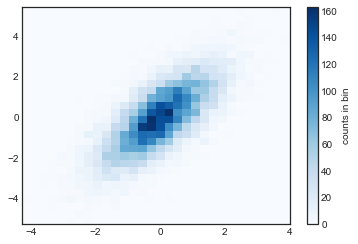

In [15]:
#Gaussian distribution 2d histogram
mean = [0, 0]       
cov = [[1, 1], [1, 2]]       
x, y = np.random.multivariate_normal(mean, cov, 10000).T #transpose
plt.hist2d(x,y,bins=30,cmap="Blues")
cb = plt.colorbar()
cb.set_label('counts in bin')

In [18]:
#np counter part of it
counts,xedges,yedges = np.histogram2d(x,y,bins=30)

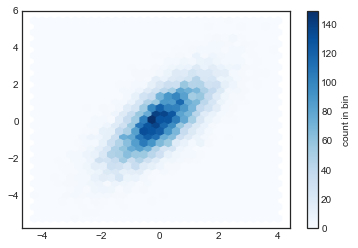

In [19]:
plt.hexbin(x,y,gridsize=30,cmap="Blues")
cb = plt.colorbar(label='count in bin')

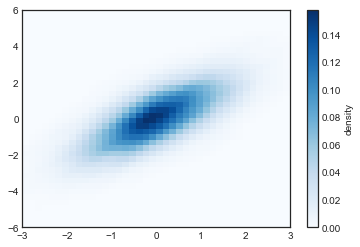

In [21]:
#kde estimation
#to smooth out the functions
from scipy.stats import gaussian_kde
data = np.vstack([x,y])
kde = gaussian_kde(data)
xgrid = np.linspace(-3,3,40)
ygrid = np.linspace(-6,6,40)
Xgrid,Ygrid = np.meshgrid(xgrid,ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(),Ygrid.ravel()]))#ravel returns a flattend array
plt.imshow(Z.reshape(Xgrid.shape),origin='lower',aspect='auto',extent=[-3,3,-6,6],cmap="Blues")
plt.colorbar(label='density')